# Winning Team Predictions (League of Legends)

Author: Josep Bravo Bravo 

# 1. Introduction

League of Legends is one of the most popular games ever existed, and has one of the most important competitive games. In this game 2 teams (blue and red) fight to take out the enemy's nexus to win the game. Each team has 5 players that control 5 champions. There are 3 lanes, a jungle, and 5 roles. 

Like all MOBA games, we have different objectives in the game which give a certain advantage in the game. This information about these objectives is what will help us make our winning prediction model. To increase our chances to win a game, there are lots of different objectives and events to do, fights to win to increase the power of your champion, as well as winning map terrain by taking down turrets and putting vision on the map.

The information needed to create our model will be obtained in the following League of Legends Ranked Games dataset from Kaggle:

https://www.kaggle.com/bobbyscience/league-of-legends-soloq-ranked-games



# 2. Game events and objectives
In order to understand all the attributes in our dataset its important to know about the following **most important events or objectives** in the game:
* **Gold and experience**: To make your champion stronger, you need to buy objects and obtain experience to level up. To do so, you have to kill minions, destroy towers, kill enemies...
* **Nexus**: This structure is the most important one of the game, as destroying this structure means winning the game.
* **Inhibitors**: This is one of the most important structure in the game. Destroying it makes the minions a lot stronger, that means that if nobody stops them, they will keep pushing lanes winning, winning map presence. Inhibitors will regenerate themselves in 5 minutes.
* **Towers**: Towers are the ones that defend our part of the map, by taking them down we gain enemy territory. There are 4 types of towers: outer towers, inner towers, base towers (defending inhibitors), nexus towers (defending nexus). Taking down the first turret gives us extra gold.
* **Wards**: To increase the chances to win its also very important to place Wards on the map. This Wards will help us obtain map vision, gaining information about who is there and what happens there, so we take the right decisions such as not getting caught by the enemy team.
* **KDA**: KDA (Kills, deaths, assist) is one of the most things about your game. Having a good KDA ratio means you have obtained a lot of gold, and taken a lot of time from the enemy, as killing them means they have to wait certain seconds out of the map before reviving again.
* **Drakes, Herald and Baron**: This 3 monsters have a very strong impact in the game. If you kill them, you obtain certain bonus that will help you take the advantage in the game. 
By killing Herald you can invocate him, and will help you to destroy the enemy towers. 
Killing drakes will give you certain bonuses depending on the drake, such as more damage, health regeneration...
Killing Baron will give you a 4 minute boost that makes near ally minion a lot stronger.




# 3. Libreries used
The following libaries are the ones used to make this notebook and model possible:


In [5]:
!pip install seaborn==0.11.0

ERROR: Could not find a version that satisfies the requirement seaborn==0.11.0
ERROR: No matching distribution found for seaborn==0.11.0


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# 4. Data Exploration and Analysis
First of all, we need to import our dataset, explore its dimensions and attributes, as well as understanding it:

In [4]:
df = pd.read_csv('DATA\\lol_ranked_games.csv')
pd.set_option('display.max_rows', None)
print("Total Rows (games) in dataset:", df.shape[0])
print("Total Columns (events/objectives) in dataset:", df.shape[1])
df

Total Rows (games) in dataset: 242572
Total Columns (events/objectives) in dataset: 59


This dataset contains about 25000 ranked games from SOLOQ Queue from a Platinium ELO. In ranked games people are classified depending on how good they are playing League of Legends. Only about 9% of people who play this game manage to arrive to Platinium ELO. By taking data from this ELO (high level) we assure the quality of the classifier, as having data from low ELOs would lead to a very low accurate model.

There are 55 features (columns) collected from the BLUE team. This features include everything I explained in "2. Game events and objectives" such as towers, drakes, kills, deaths, gold, experience, level…


The first thing to do before starting to work with the dataset is to treat null values. 

In [ ]:
print('Number of missing values in our dataset:', df.isnull().sum().sum())


As we can see above, there are no null values in our data.

Once we have understood our dataset it's time to analyze it and see which attributes are relevant to determine which the winning team.

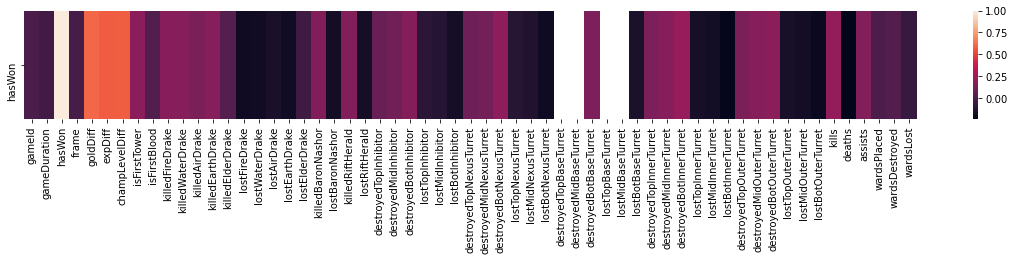

In [9]:
#We take only the row of the atribute we are going to preddict (hasWon) from the heatmap matrix (correlation matrix)
winning_correlation = df.corr()['hasWon'].to_frame().T 
plt.subplots(figsize=(20, 2))
sns.heatmap(winning_correlation)
plt.show()


The results obtained in the heatmap are the ones we expected. 
Attributes like deaths and losing objective have a negative correlation with winning the game, while attributes like kills, destroying towers... have a positive correlation.

We can also see from the heatmap that attributes like firstTower (granting about 1000 gold and map domination) are much more relevant than getting first blood (that will just give the team an extra 400 gold).

We can see this difference of importance of the attribute by plotting the probability of being the winning team depending on its attribute.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


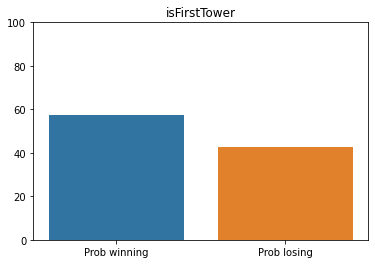

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


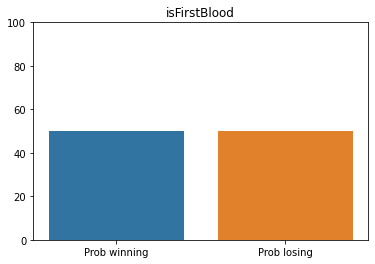

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


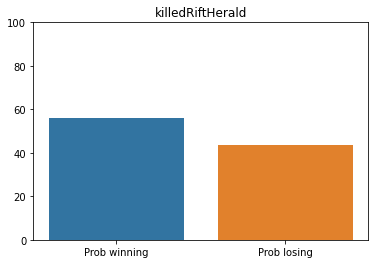

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


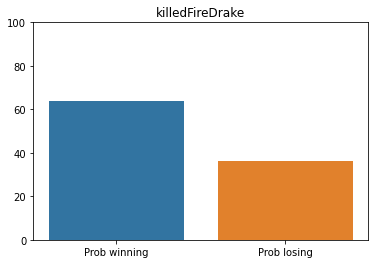

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


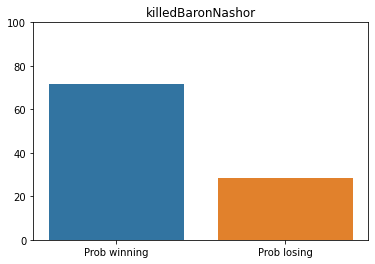

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


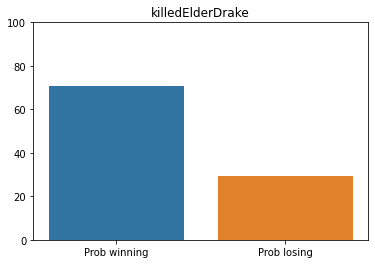

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


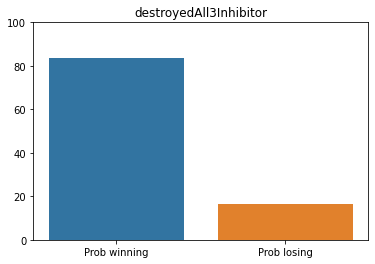

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


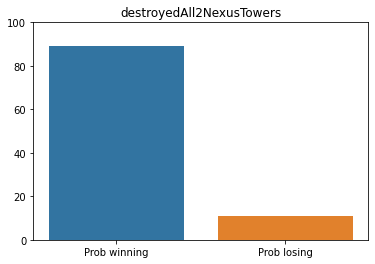

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


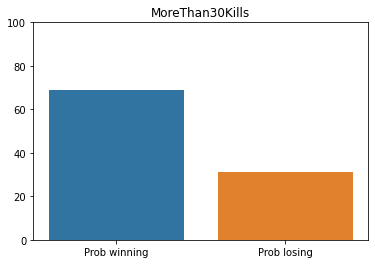

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


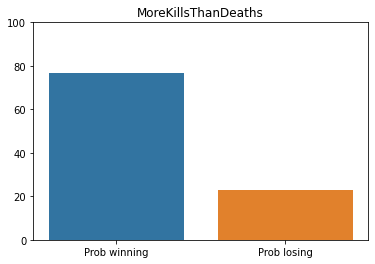

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


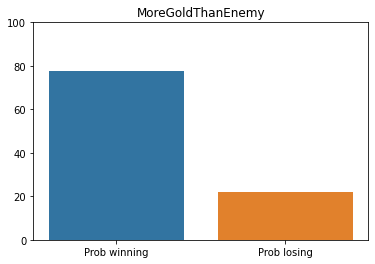

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


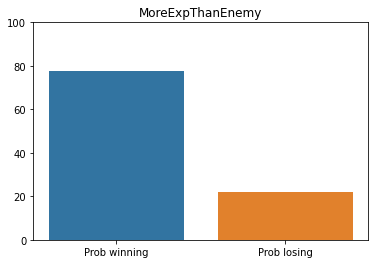

In [10]:
#We obtain the number of rows that win and get the first towers  and we divide it by the total of rows to get the probability
attributes = ['isFirstTower', 'isFirstBlood','killedRiftHerald', 'killedFireDrake', 'killedBaronNashor', 'killedElderDrake']
for atribute in attributes:
    Prob_winning = sum(np.logical_and(df[atribute] == 1, df['hasWon'] == 1)) / sum(df[atribute] == 1) * 100
    ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
    ax.set_title(atribute)
    ax.set_ylim([0,100])
    plt.plot()
    plt.show()

#Calculate probability of winning if you have destroyed all the enemy inhibitors
df_aux = pd.DataFrame(df, columns = ['destroyedTopInhibitor', 'destroyedMidInhibitor','destroyedBotInhibitor'])
df_aux = df_aux.sum(axis=1)
wins_with_all_inhibitors = sum(np.logical_and(df_aux == 3, df['hasWon'] == 1))
all_games_3_inhibis = sum(df_aux == 3)
Prob_winning = wins_with_all_inhibitors / all_games_3_inhibis * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('destroyedAll3Inhibitor')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have destroyed all the enemy nexus towers
df_aux = pd.DataFrame(df, columns = ['destroyedTopNexusTurret', 'destroyedMidNexusTurret','destroyedBotNexusTurret'])
df_aux = df_aux.sum(axis=1)
wins_with_all_nexus_towers = sum(np.logical_and(df_aux == 3, df['hasWon'] == 1))
all_games_2_nexus_towers = sum(df_aux == 3)
Prob_winning = wins_with_all_nexus_towers / all_games_2_nexus_towers * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('destroyedAll2NexusTowers')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more than 30 kills
Prob_winning = sum(np.logical_and(df['kills'] > 30, df['hasWon'] == 1)) / sum(df['kills'] > 30) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreThan30Kills')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more kills than deaths
Prob_winning = sum(np.logical_and(df['kills'] > df['deaths'], df['hasWon'] == 1)) / sum(df['kills'] > df['deaths']) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreKillsThanDeaths')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more gold than the enemy
Prob_winning = sum(np.logical_and(df['goldDiff'] > 0, df['hasWon'] == 1)) / sum(df['goldDiff'] > 0) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreGoldThanEnemy')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more exp than the enemy
Prob_winning = sum(np.logical_and(df['expDiff'] > 0, df['hasWon'] == 1)) / sum(df['expDiff'] > 0) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreExpThanEnemy')
ax.set_ylim([0,100])
plt.plot()
plt.show()


As we can see in the graphics we did above, there are attributes that have a huge impact on the output of the game.
Once we've analyzed and explored in depth our data and attributes we can proceed to create our Classification model.

# 5. Classification

First of all, we  are going to create a new dataset, keeping only the attributes that are the most useful we've seen in the previous section. Then we're going to divide our data in 2, obtaining the train and test set. We're going to use the 80% of the data for our train set, which we will use to train our model. The rest will be used to test the model.

In [11]:
#We only keep the atributtes that have a positive correlation (greater than 0.1) with the objective
attributes = list(filter(lambda x: abs(float(winning_correlation[x])) > 0.1, df.columns))
df = df[attributes]

In [12]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [13]:
y = df['hasWon']
X = df.loc[:, df.columns != 'hasWon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

Accuracy KNN : 0.77747 

Accuracy Decission trees : 0.72755 

Accuracy Random Forest : 0.79654 



In the previous execution I tried to implement SVM too, but due to it's high computational cost it was not a good option to implement (it lasted more than 1 hour).


### Cross-validation

From the previous models and its accuracy, we obtain that Decision trees classifier with the Ensemble Random Forest is the best classifier of the ones tested. We now proceed to do the same test with cross-validation to assure the accuracy's classification is correct:

In [15]:
scores = cross_val_score(knn, X, y, cv=5) 
print('Cross-val Knn:',scores)
print('Cross-val Knn mean:',scores.mean())

scores = cross_val_score(tree, X, y, cv=5)
print('Cross-val Decision Tree:',scores)
print('Cross-val Decision Tree mean:',scores.mean())

scores = cross_val_score(rforest, X, y, cv=5)
print('Cross-val Random forest:',scores)
print('Cross-val Random forest mean:',scores.mean())

Cross-val Knn: [0.78202618 0.78165516 0.77911531 0.77400338 0.76800511]
Cross-val Knn mean: 0.7769610269970084
Cross-val Decision Tree: [0.71328455 0.70844069 0.70907367 0.70930041 0.70517789]
Cross-val Decision Tree mean: 0.7090554407996058
Cross-val Random forest: [0.79845409 0.79849531 0.79434802 0.79018428 0.78389743]
Cross-val Random forest mean: 0.7930758257435088


Generally speaking It's very important to do Cross-validation in our model, because we could be selecting just a small percentage of all the data to test our models, and we could be adapting just to this small part of all that data. To avoid this we test the model with all the data available, making partitions in this data and choosing one of these partitions to do the test and the others to train, and so on with every partition.
To know how many partitions we should be selecting we are going to to the following graphic:

Text(0, 0.5, 'Accuracy')

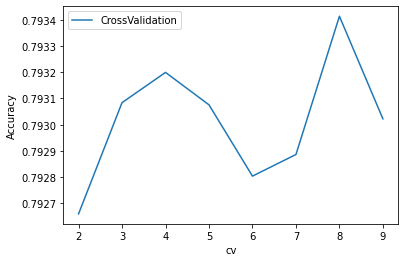

In [16]:
scoresMean = []
for i in range(2, 10):
    scoresMean.append(cross_val_score(rforest, X, y, cv=i).mean()) #Probem de cross validar els SVM

plt.plot(range(2, 10), scoresMean, label= 'CrossValidation')
plt.legend()
plt.xlabel('cv')
plt.ylabel('Accuracy')

In the previous graphic I cross-validate our chosen model (RandomForest) with different partitions, and we can see that 8 is the best number of partitions to cross-validate with. If we look closely we can see that the difference of accuracy's between one number of partitions or another is very small and not very important to the output.

### Hyperparameter Search

The next step in our classifier is to find its best hyperparameters. To do so there are different ways. I've chosen to use the RandomizedSearchCV from sklearn because it's the fastest one, as having such a big dataset (about 250k rows) won't allow me to do a more depth search (such as GridSearchCV).

In [17]:
sc = StandardScaler() #Standarize data
x_train = pd.DataFrame(sc.fit_transform(X_train)) #Fit to data, then transform it.
x_test = pd.DataFrame(sc.transform(X_test)) #Perform standardization by centering and scaling

#max-features = Quantity of data to chose for bagging (paralel); 
#random_state: randomness when chosing the data
# n_estimadors: number of trees to execute
RFC = RandomForestClassifier()

RSC = RandomizedSearchCV(estimator = RFC, param_distributions ={'max_depth' : [64,128,256],'n_estimators' : [150,200,250], 'max_features' : [0.2,0.5,0.8]},cv = 4)
search = RSC.fit(X_train,y_train)
y_pred = RSC.predict(X_test)

# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV CV best score : {:.4f}\n\n'.format(search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (search.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (search.best_estimator_))

RandomizedSearchCV CV best score : 0.8077


Parameters that give the best results : 

 {'n_estimators': 250, 'max_features': 0.2, 'max_depth': 64}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_depth=64, max_features=0.2, n_estimators=250)


As we can see in the previous results, by choosing the best hyperparameters we can only improve about 1% the accuracy

### Roc Curve and Confusion Matrix

Now that we've reached a good accuracy by choosing the best model, cross-validating it and doing a hyperparameter search for our model, we can proceed to show the ROC Curve and the Confusion Matrix to see the results.

The ROC Curve visualy represents the relation between the True Positive Rate (TPR) and teh False Positive Rate (FPR).

Classifier without prediction capacity: ROC AUC=0.500
Our model: ROC AUC=0.855


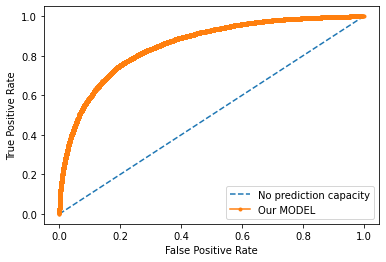

In [18]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = rforest.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Classifier without prediction capacity: ROC AUC=%.3f' % (ns_auc))
print('Our model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No prediction capacity')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Our MODEL')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [19]:
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     24349
           1       0.81      0.81      0.81     24166

    accuracy                           0.81     48515
   macro avg       0.81      0.81      0.81     48515
weighted avg       0.81      0.81      0.81     48515

Confusion Matrix: 
 [[19806  4543]
 [ 4571 19595]]


In the previous representations of the results we can see the final accuracy we obtain in our model: 81%. We also can see other metrics to evaluate our model, like f1-score, in which we obtain the same results. Finally we can see in the confusion matrix that we fail to predict about 20% of the cases, resulting in FN or FP. This results make a lot of sense in our dataset due to the dificulty to predict the output of victory in a game played like League Of Legends.

# 7. Conclusions

Finally, we can sum up our conclusions in 3 parts:

1. Gold is the most important feature to make the prediction. We can see this on the high correlation that goldDiff has with hasWon, and also in some of the graphics that calculate the probability of winning given a certain feature like FirstTower (which give a lot of gold).

2. The amount of data in this dataset was so big that trying a lot of models and doing hyperparameter search with GridSearchCV was not possible. In general the computational time to execute the creation of models or trying a lot of parameterers was so high, executing during hours to obtain the results.

3. At the end, we obtain an accuracy of 81% optimizing the model with the best hyperparameters and doing cross-validation. I think we can conclude that this accuracy is actually not that bad as it may seem. Winning or not a game of League of Legends doesn't depend only on the data we're given, it depends on more things like map control, team play... Apart from this, we can see that we are not looking at a dataset of proplayers, and in this rank it's more common that game advandadge change at late game and made come backs happen more frequently.